# C2349C Deep Learning Fundamentals Coursework 1

### Lim Zhao Hong, Student ID: 20065320

### Key Indicators of Heart Disease Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## 1. Import required package and load data from file into pandas dataframe

In [52]:
import pandas as pd
import numpy as np
import numpy.random as nr
from keras import models
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import the data using the file path
data = pd.read_csv('heart_disease_dataset.csv', sep=',')
print('Data shape: {}'.format(data.shape))

Data shape: (319795, 18)


In [53]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [55]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [56]:
data.isnull().count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

## 2. Data Preparation
Extract the label column containing the HeartDisease and remove from the dataset

In [57]:
y_col_name = 'HeartDisease'
y_data = data[y_col_name]

x_data = data.drop(y_col_name, axis=1)

### Perform One-Hot Encoding on all categorical data columns

In [58]:
# OneHot Encode categorical data
categorical_data = x_data.select_dtypes(include=['object']).copy()
for col in categorical_data.columns:
    categorical_data[col] = categorical_data[col].astype('category')

categorical_data = pd.get_dummies(categorical_data)
print('Categorical data shape: {}'.format(categorical_data.shape))

Categorical data shape: (319795, 46)


In [61]:
# OneHot Encode categorical label data for y-axis

y_tmp = y_data.astype('category')

y_data = pd.get_dummies(y_tmp)

### Normalize data scales for numerical data and the labels

In [62]:
# Standard Scale numerial feature data
numerical_data = x_data.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numerical_data.values #returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numerical_data = pd.DataFrame(data_tmp, columns=numerical_data.columns)

# Standard Scale numerial label data
y_tmp = pd.DataFrame(y_data).values #returns a numpy array
y_scaler = MinMaxScaler()
y_tmp = y_scaler.fit_transform(y_tmp)
y_tmp = y_tmp.reshape(-1)
y_data = pd.Series(y_tmp)

In [46]:
# Combine categorial and numerical data
x_data = pd.concat([numerical_data, categorical_data], axis=1)
print('x_data data shape: {}'.format(x_data.shape))

x_col_name = x_data.columns
x_col_count = len(x_col_name)

x_data data shape: (319795, 50)


In [63]:
numerical_data

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776
...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977
319791,0.238291,-0.424070,-0.490039,-1.460354
319792,-0.642753,-0.424070,-0.490039,-0.763977
319793,0.705560,-0.424070,-0.490039,3.414282


In [64]:
y_data

0          1.0
1          0.0
2          0.0
3          1.0
4          0.0
          ... 
2558355    1.0
2558356    0.0
2558357    1.0
2558358    1.0
2558359    0.0
Length: 2558360, dtype: float64

In [65]:
# Combine categorial and numerical data
x_data = pd.concat([numerical_data, categorical_data], axis=1)
x_col_name = x_data.columns
x_col_count = len(x_col_name)

In [66]:
x_col_count

50

## 3. Split the data

### Method 1

In [69]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

network = models.Sequential()

# This is 1 input layer of x_col_count nodes and 1 output layer of 1 node
#network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))

# >>>>>>>>> the following set is a sample if to create multiple layer >>>>>>>>>>>>>
#example to create multiple layers. the following example is 
# 1 input layer of x_col_count nodes 
# 2 hidden layers of 5 and 3 nodes respectively
# 1 output layer of 1 node on predicted sales pricing
# use relu first then sigmoid. Relu is more superior
network.add(layers.Dense(5, activation='relu', input_shape=(x_col_count,)))
network.add(layers.Dense(3, activation='relu'))
network.add(layers.Dense(1, activation='softmax'))
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Observe the use loss function in the codes below
network.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

# Observe the setting of shuffle to True
# Play around the epochs, batch_size to see the effect 
# (Try to achieve <0.001 loss)
network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2, shuffle=True)
# batch determine the number of iteration in each epoch. The smaller the number, the larger the number of iteration

test_loss, test_error = network.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test error: {:.4f}'.format(test_error))

#if loss or mse keep going down, it mean the model is getting better, not overfitted yet

ValueError: Found input variables with inconsistent numbers of samples: [319795, 2558360]

### Method 2

In [68]:
# Define the model
network = models.Sequential()
network.add(layers.Dense(1, activation='softmax', input_shape=(x_col_count,)))
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4)

print('X_train data shape: {}'.format(X_train.shape))
print('X_test data shape: {}'.format(X_test.shape))

# Specify the validation split in the fit method
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [319795, 2558360]

## 4. Build and train model

In [14]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

network = models.Sequential()

# This is 1 input layer of x_col_count nodes and 1 output later of 1 node
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))

# >>>>>>>>> the following set is a sample if to create multiple layer >>>>>>>>>>>>>
#example to create multiple layers. the following example is 
# 1 input layer of x_col_count nodes 
# 2 hidden layers of 5 and 3 nodes respectively
# 1 output layer of 1 node on predicted housing pricing
#network.add(layers.Dense(3, activation='relu', input_shape=(x_col_count,)))
#network.add(layers.Dense(1, activation='sigmoid'))
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Observe the use loss function in the codes below
#network.compile(optimizer='sgd',
#                loss='mean_squared_error',
#               metrics=['mse'])

# Observe the setting of shuffle to True
# Play around the epochs, batch_size to see the effect 
# (Try to achieve <0.001 loss)
nr.seed(9898)

network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Plot loss and accuracy graph
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
322/322 [==============================] - 1s 2ms/step - loss: 0.1396 - mae: 0.3675 - val_loss: 0.0757 - val_mae: 0.2739
Epoch 2/20
322/322 [==============================] - 0s 1ms/step - loss: 0.0473 - mae: 0.2137 - val_loss: 0.0304 - val_mae: 0.1730
Epoch 3/20
322/322 [==============================] - 0s 1ms/step - loss: 0.0208 - mae: 0.1412 - val_loss: 0.0154 - val_mae: 0.1223
Epoch 4/20
322/322 [==============================] - 0s 1ms/step - loss: 0.0112 - mae: 0.1025 - val_loss: 0.0089 - val_mae: 0.0927
Epoch 5/20
322/322 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0790 - val_loss: 0.0057 - val_mae: 0.0735
Epoch 6/20
322/322 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0631 - val_loss: 0.0038 - val_mae: 0.0600
Epoch 7/20
322/322 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0517 - val_loss: 0.0027 - val_mae: 0.0499
Epoch 8/20
322/322 [==============================] - 0s 1ms/step - loss: 0.

## 5. Evaluate the model

In [15]:
test_loss, test_mae = network.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test mae: {:.4f}'.format(test_mae))

44/44 [==============================] - 0s 1ms/step - loss: 1.5110e-04 - mae: 0.0097
Test loss: 0.0002
Test mae: 0.0097


### Add the codes for plotting the graph to visualise the evaluation

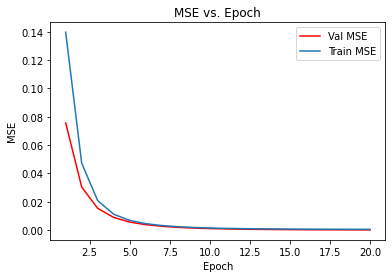

In [16]:
import matplotlib.pyplot as plt
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Val MSE')
    plt.plot(x, train_loss, label = 'Train MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE vs. Epoch')
    plt.legend()
    
plot_loss(history)

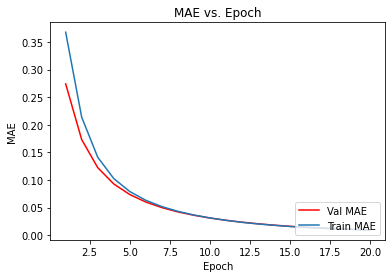

In [17]:
def plot_mse(history):
    train_acc = history.history['mae']
    test_acc = history.history['val_mae']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Val MAE')
    plt.plot(x, train_acc, label = 'Train MAE')  
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs. Epoch')  
    plt.legend(loc='lower right')

plot_mse(history)

## 6. Perform a prediction

In [19]:
predictData = pd.read_csv('PredictTest.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'PredictTest.csv'

In [20]:
predictDataCat = pd.get_dummies(predictData.select_dtypes(include=['object']).copy())
for col in categorical_data.columns:
    if col not in predictDataCat.columns:
        print("Adding missing feature {}".format(col))
        predictDataCat[col] = 0
        
print(predictDataCat.shape)

NameError: name 'predictData' is not defined

In [21]:
# Standard Scale numerial feature data
numericData = predictData.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numericData.values # Returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numericData = pd.DataFrame(data_tmp, columns=numericData.columns)
print(numericData)

NameError: name 'predictData' is not defined

In [22]:
predictDataFinal = pd.concat([numericData, predictDataCat], axis=1)
print('Predict data final shape: {}'.format(predictDataFinal.shape))

NameError: name 'numericData' is not defined

In [23]:
result = network.predict(predictDataFinal)
result = y_scaler.inverse_transform(result)
print(result)

NameError: name 'predictDataFinal' is not defined

In [24]:
dir(network)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [25]:
network.weights

[<tf.Variable 'dense_3/kernel:0' shape=(4729, 1) dtype=float32, numpy=
 array([[-0.02624623],
        [ 0.06962098],
        [ 0.08242091],
        ...,
        [-0.10632122],
        [-0.03516681],
        [-1.0969803 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([-1.1175264], dtype=float32)>]